# Trabajo Final Clustering
## Analysis of TED talk topics using document clusterin
### Santiago González Silot
#### sgonzalezsilot@correo.ugr.es

#Setup:
Set up script installs
1. Updates gcc in Colab
1. Installs Conda
1. Install RAPIDS' current stable version of its libraries, as well as some external libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Copy RAPIDS .so files into current working directory, a neccessary workaround for RAPIDS+Colab integration.


In [1]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 328 (delta 92), reused 98 (delta 55), pack-reused 171
Receiving objects: 100% (328/328), 94.64 KiB | 13.52 MiB/s, done.
Resolving deltas: 100% (154/154), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 887.4 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,145 kB]
Hit:13 http://ppa.launchpad.

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [3]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import osmars 
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Se han truncado las últimas 5000 líneas del flujo de salida.
libjpeg-turbo-2.1.4  | 988 KB    | ########## | 100%

fiona-1.8.22         | 974 KB    |            |   0%
fiona-1.8.22         | 974 KB    | 1          |   2%
fiona-1.8.22         | 974 KB    | 3          |   3%
fiona-1.8.22         | 974 KB    | 6          |   7%
fiona-1.8.22         | 974 KB    | 9          |  10%
fiona-1.8.22         | 974 KB    | #3         |  13%
fiona-1.8.22         | 974 KB    | #6         |  16%
fiona-1.8.22         | 974 KB    | #9         |  20%
fiona-1.8.22         | 974 KB    | ##2        |  23%
fiona-1.8.22         | 974 KB    | ##6        |  26%
fiona-1.8.22         | 974 KB    | ##9        |  30%
fiona-1.8.22         | 974 KB    | ###2       |  33%
fiona-1.8.22         | 974 KB    | ###9       |  39%
fiona-1.8.22         | 974 KB    | ####5      |  46%
fiona-1.8.22         | 974 KB    | #####2     |  53%
fiona-1.8.22         | 974 KB    | #####9     |  59%
fiona-1.8.22         | 974 KB    | ##

ModuleNotFoundError: ignored

## cuDF and cuML Examples #

Now you can run code! 

What follows are basic examples where all processing takes place on the GPU.

##[cuDF](https://github.com/rapidsai/cudf)#

Load a dataset into a GPU memory resident DataFrame and perform a basic calculation.

Everything from CSV parsing to calculating tip percentage and computing a grouped average is done on the GPU.

##[cuML](https://github.com/rapidsai/cuml)#

This snippet loads a 

As above, all calculations are performed on the GPU.

## Resto de paquetes

In [4]:
!pip install scikit-learn
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install -U sentence-transformers
!pip install kmeans-pytorch
!pip install pycave

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 59.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 27.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 884.0/887.4 MB 121.5 

# Importación de librerias y definición de funciones

In [1]:
import pandas as pd
import random
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk
import matplotlib.pyplot as plt
from nltk.cluster import KMeansClusterer
from sklearn import metrics
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pickle
from pycave.bayes import GaussianMixture
import gc
from cuml.cluster import AgglomerativeClustering, KMeans

nltk.download('stopwords')
stops_en = set(stopwords.words("english"))
stops_es = set(stopwords.words("spanish"))

# Para serializar el modelo con pickle
def saveModel(model, model_name, path_name= "/content/drive/MyDrive/Colab Notebooks/all models"):
  pickle.dump(model,open(path_name + "/" + model_name,"wb"))

# Para cargar el modelo serializado con pickle
def loadModel(model_name, path_name = "/content/drive/MyDrive/Colab Notebooks/all models"):
  return pickle.load(open(path_name + "/" + model_name,"rb"))

def comprobarGPU():
  if torch.cuda.is_available():    

      # Tell PyTorch to use the GPU.    
      device = torch.device("cuda")

      print('There are %d GPU(s) available.' % torch.cuda.device_count())

      print('We will use the GPU:', torch.cuda.get_device_name(0))

  # If not...
  else:
      print('No GPU available, using the CPU instead.')
      device = torch.device("cpu")



def plot_scores(K_range,dbi_array, ss_array, ss_array_eu, calinski_array):

  plt.plot(K_range, dbi_array, 'bx-')
  plt.xlabel('k')
  plt.ylabel('DBI')
  #plt.title('Elbow Method For Optimal k')
  plt.show()

  plt.plot(K_range, ss_array, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Silhouette Cosine')
  #plt.title('Elbow Method For Optimal k')
  plt.show()

  plt.plot(K_range, ss_array_eu, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Silhouette Euclidean')
  #plt.title('Elbow Method For Optimal k')
  plt.show()

  plt.plot(K_range, calinski_array, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Calinski')
  #plt.title('Elbow Method For Optimal k')
  plt.show()


def plot_top_ngrams_barchart(text, n=1, http=False, color="Greens_d", idioma="EN"):

    if idioma == "EN":
      stop = set(stopwords.words('english'))
    else:
      stop = set(stopwords.words('spanish'))
      stop.add("number")

    if http:
      stop.add('http')
      stop.add('https')
      stop.add('co')
      stop.add('URL')
      stop.add('url')



    # new = text.str.split()
    # new = new.values.tolist()
    corpus=[word for i in text for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n), stop_words=list(stop)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    pal = sns.color_palette(color, 10)
    fig = sns.barplot(x=y,y=x, palette=pal[::-1])
    return fig

def cluster_visual_analisis(model, tipo_modelo, true_k):

  if tipo_modelo == "cuML":
    labels = model.labels_
  else:
    labels = model.predict(text_embeddings.astype(np.float32))

  result={'cluster':labels,'ted':title}
  result=pd.DataFrame(result)
  ted_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
  for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['ted'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])

    wordcloud = WordCloud(background_color="white").generate(text)
    titles=ted_cl[ted_cl.cluster==k]['title']         
    print(f"Cluster {k}")
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    a = plot_top_ngrams_barchart(s['ted'], n=1)
    plt.show()

    a = plot_top_ngrams_barchart(s['ted'], n=2, color="Blues_d")
    plt.show()

    a = plot_top_ngrams_barchart(s['ted'], n=3, color="Reds_d")
    plt.show()

def check_clusters(model):
  for m in model:
    values, counts = np.unique(m.labels_, return_counts=True)
    print(values)
    print(counts)

/usr/local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/usr/local/lib/python3.8/site-packages/cupy/_environment.py:439: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stabl

# Conexión con Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')
comprobarGPU()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


# Cargamos el dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ted_talks_en.csv")
#df = df.sample(1000, random_state=72)
texts = df["transcript"]
title = df["title"]
texts

0       Thank you so much, Chris. And it's truly a gre...
1       About 10 years ago, I took on the task to teac...
2       (Music: "The Sound of Silence," Simon & Garfun...
3       If you're here today — and I'm very happy that...
4       Good morning. How are you? (Audience) Good. It...
                              ...                        
4000    "I'm 14, and I want to go home." "My name is B...
4001    In 1905, psychologists Alfred Binet and Théodo...
4002    Picture yourself driving down the road tomorro...
4003    In early 1828, Sojourner Truth approached the ...
4004    Can you guess what you’re looking at? Is it a ...
Name: transcript, Length: 4005, dtype: object

# Tokenizamos las palabras con tf-idf

In [28]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize,
                        #max_features = None,
                        min_df = 0.05,
                        max_df = 0.5)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(texts)

# Check Shape of Count Vector
X_train_counts.shape

import sklearn
X_norm = sklearn.preprocessing.normalize(X_train_counts, norm='l2')

/usr/local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [29]:
X_train_counts.shape

(4005, 1666)

# Experimentos tf-idf

## KMeans

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
model_array = []
calisnki_array = []
K_range = range(2,15)
for i in K_range:
  kmeans = KMeans(n_clusters=i, n_init=25).fit(X_norm.toarray())
  labels = kmeans.labels_

  dbi = metrics.davies_bouldin_score(X_norm.toarray(), labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(X_norm.toarray(), labels)
  calisnki_array.append(ca)

  model_array.append(kmeans)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array, "tfidf kmean extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

## GMM

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Ha tardado 1.5129137635231018 minutos.


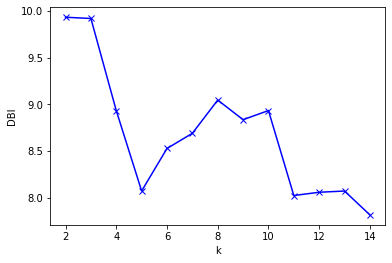

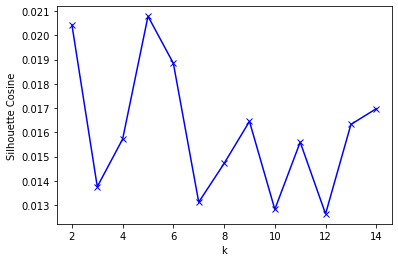

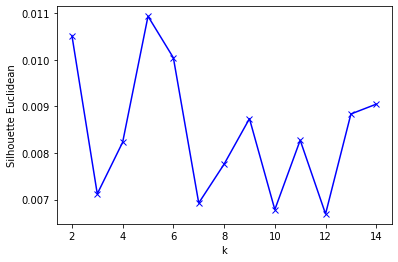

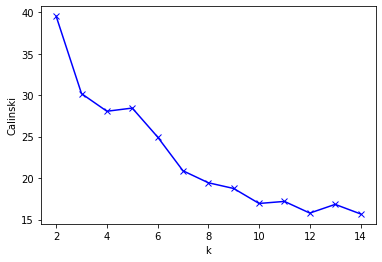

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
calisnki_array = []
model_array = []
K_range = range(2,15)
for i in K_range:
  gmm = GaussianMixture(num_components=i, trainer_params=dict(accelerator= 'gpu')).fit(X_norm.toarray().astype(np.float32))
  labels = gmm.predict(X_norm.toarray().astype(np.float32))

  dbi = metrics.davies_bouldin_score(X_norm.toarray(), labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(X_norm.toarray(), labels)
  calisnki_array.append(ca)

  model_array.append(gmm)

fin = time.time()

print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array,"tfidf gmm extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu, calisnki_array)

## Agglomerative Clustering

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
calisnki_array = []
#model_array = []
K_range = range(2,15)
for i in K_range:
  agglomerative = AgglomerativeClustering(n_clusters=i).fit(X_norm.toarray())
  labels = agglomerative.labels_

  dbi = metrics.davies_bouldin_score(X_norm.toarray(), labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(X_norm.toarray(), labels)
  calisnki_array.append(ca)

  #model_array.append(agglomerative)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array, "tfidf_aglo")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

# Tokenizamos las palabras con embedding

In [2]:
# Cargamos el embedder y obtenemos los embeddings
embedder = SentenceTransformer("bert-base-cased")
# embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
# embedder = SentenceTransformer('sentence-transformers/sentence-t5-xxl')
text_embeddings = embedder.encode(list(texts))
text_embeddings.shape

NameError: ignored

## KMeans

Ha tardado 0.18212621609369914 minutos.


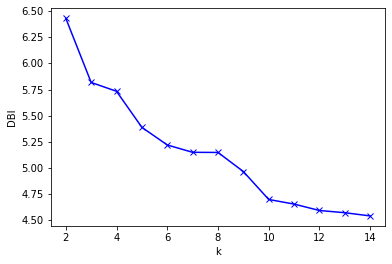

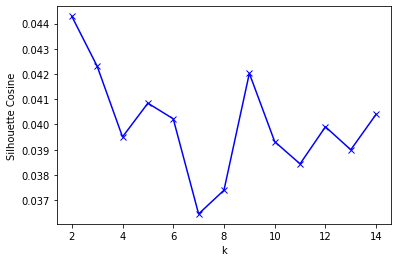

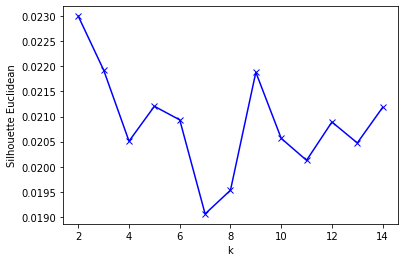

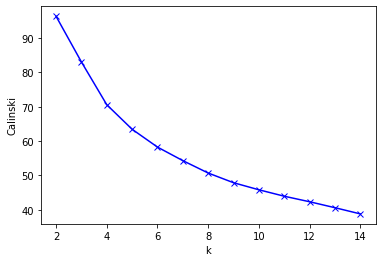

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
model_array = []
calisnki_array = []
K_range = range(2,15)
for i in K_range:
  kmeans = KMeans(n_clusters=i, n_init=25).fit(text_embeddings)
  labels = kmeans.labels_

  dbi = metrics.davies_bouldin_score(text_embeddings, labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(text_embeddings, labels)
  calisnki_array.append(ca)

  model_array.append(kmeans)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array, "embeddings kmean extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

## GMM

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting K-means estimator...
INFO:pycave.clustering.kmeans.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pycave.clustering.kmeans.estimator:Fitting K-Means...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Running initialization...


Training: 0it [00:00, ?it/s]

INFO:pycave.bayes.gmm.estimator:Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Ha tardado 0.8135708610216776 minutos.


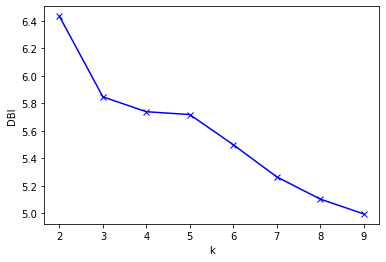

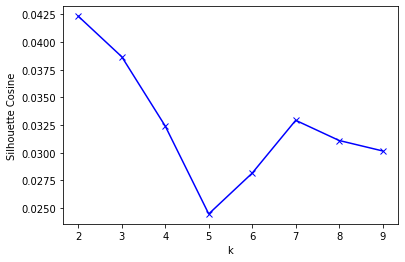

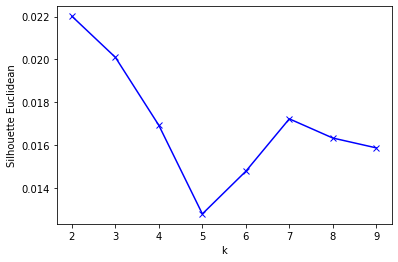

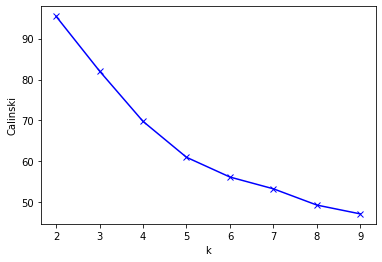

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
calisnki_array = []
model_array = []
K_range = range(2,10)
for i in K_range:
  gmm = GaussianMixture(num_components=i, trainer_params=dict(accelerator= 'gpu')).fit(text_embeddings.astype(np.float32))
  labels = gmm.predict(text_embeddings.astype(np.float32))

  dbi = metrics.davies_bouldin_score(text_embeddings, labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(text_embeddings, labels)
  calisnki_array.append(ca)

  model_array.append(gmm)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array, "embeddings gmm extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

## Agglomerative Clustering

Ha tardado 0.14392120043436687 minutos.


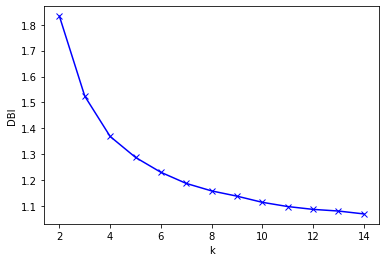

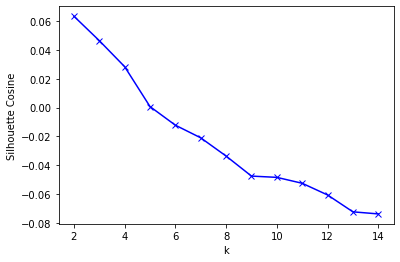

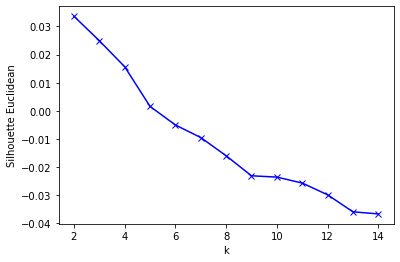

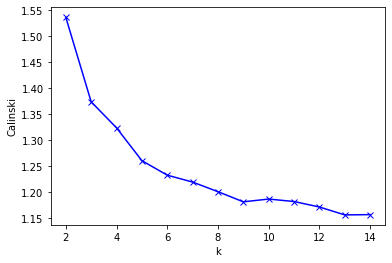

In [ ]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
calisnki_array = []
model_array = []
K_range = range(2,15)
for i in K_range:
  agglomerative = AgglomerativeClustering(n_clusters=i).fit(text_embeddings)
  labels = agglomerative.labels_

  dbi = metrics.davies_bouldin_score(text_embeddings, labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(text_embeddings, labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(text_embeddings, labels)
  calisnki_array.append(ca)

  model_array.append(agglomerative)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

saveModel(model_array,"embeddings aglo extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

# Visualizaciones

In [55]:
models = loadModel("tfidf aglo 2.0")

In [54]:
models

[AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering(),
 AgglomerativeClustering()]

Ha tardado 0.3215059240659078 minutos.


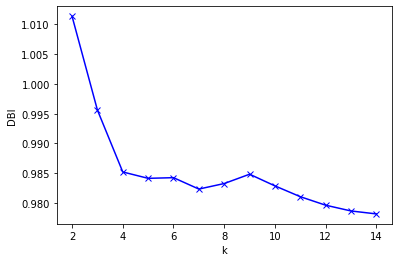

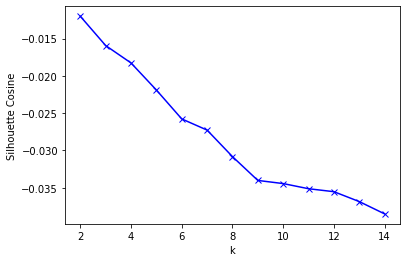

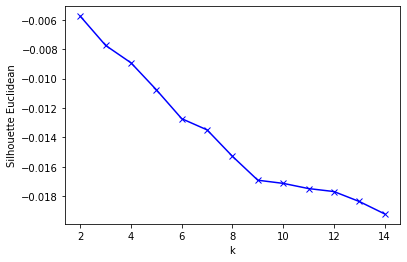

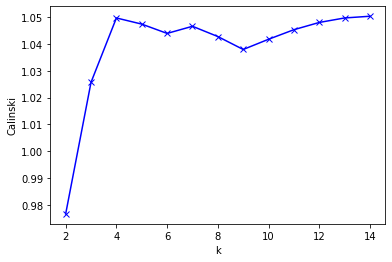

In [57]:
inicio = time.time()
dbi_array = []
ss_array = []
ss_array_eu = []
#model_array = []
calisnki_array = []
K_range = range(2,15)
for i in models:

  # labels = i.predict(text_embeddings.astype(np.float32))
  labels = i.labels_

  dbi = metrics.davies_bouldin_score(X_norm.toarray(), labels)
  dbi_array.append(dbi)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='cosine')
  ss_array.append(ss)

  ss = metrics.silhouette_score(X_norm.toarray(), labels , metric='euclidean')
  ss_array_eu.append(ss)

  ca = metrics.calinski_harabasz_score(X_norm.toarray(), labels)
  calisnki_array.append(ca)

  #model_array.append(kmeans)

fin = time.time()
print(f"Ha tardado {(fin-inicio)/60} minutos.")

#saveModel(model_array, "tfidf kmean extra")
plot_scores(K_range,dbi_array,ss_array,ss_array_eu,calisnki_array)

## Con Embeddings KMeans

In [12]:
# Cargo el modelo/
models = loadModel("embeddings_kmeans.pkl")

Cluster 0


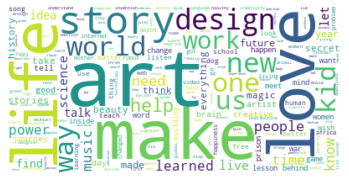

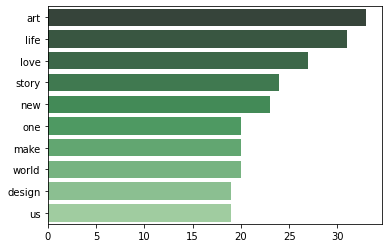

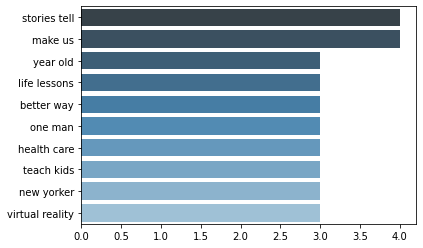

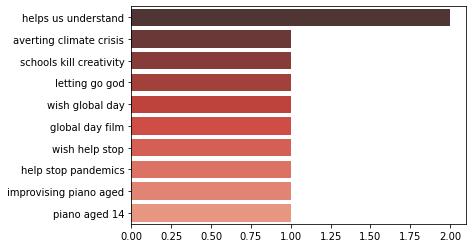

Cluster 1


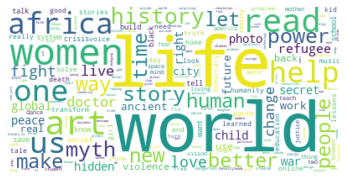

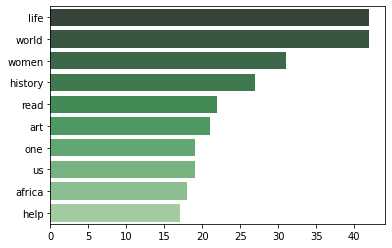

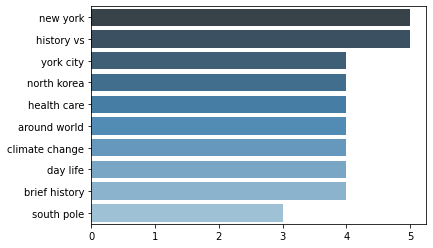

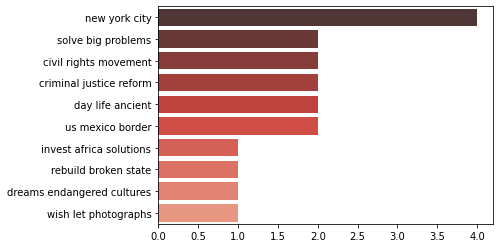

Cluster 2


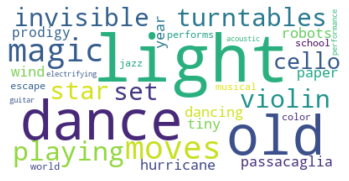

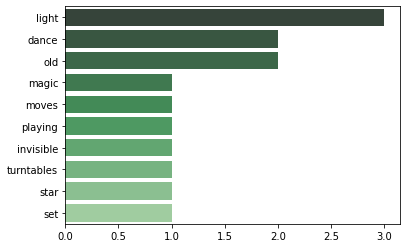

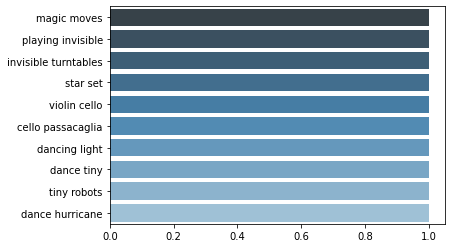

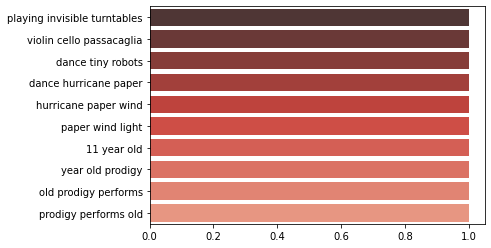

Cluster 3


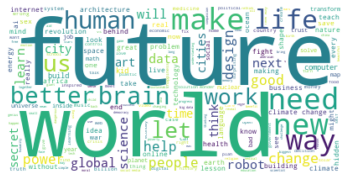

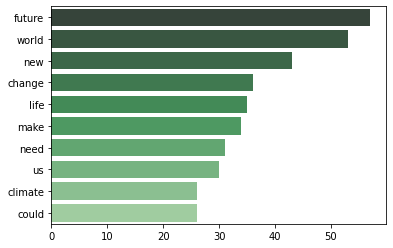

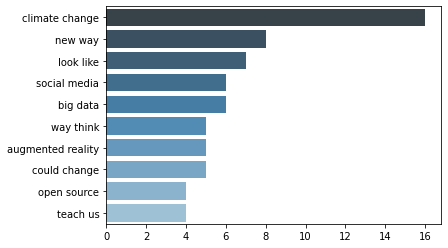

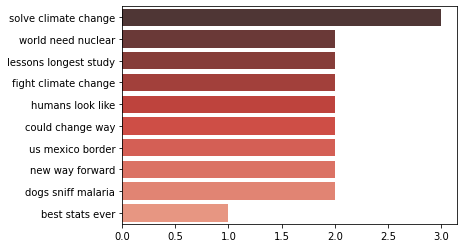

Cluster 4


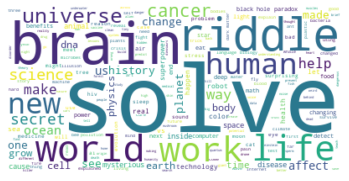

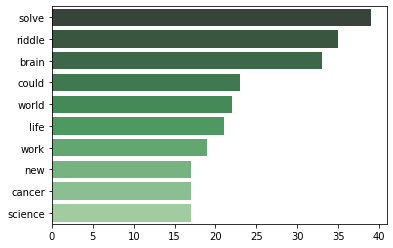

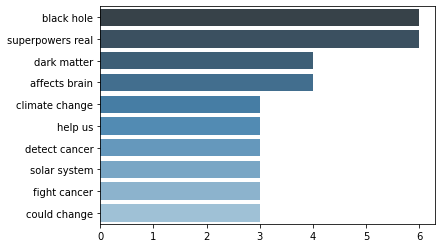

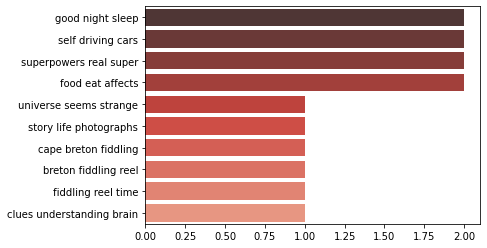

In [ ]:
i = 5
cluster_visual_analisis(model=models[i-2],tipo_modelo="cuML",true_k=i)

## Con Embeddings GMM

Predicting: 0it [00:00, ?it/s]

Cluster 0


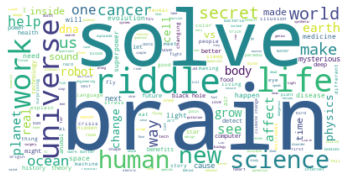

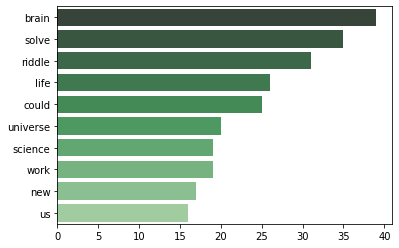

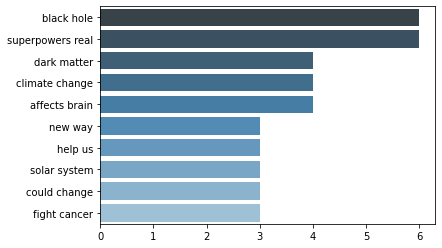

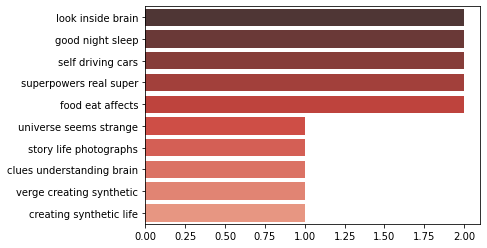

Cluster 1


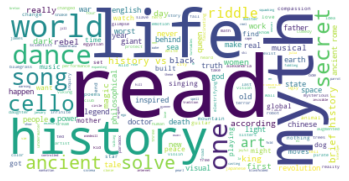

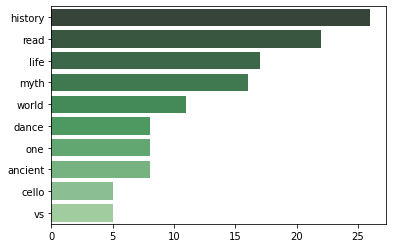

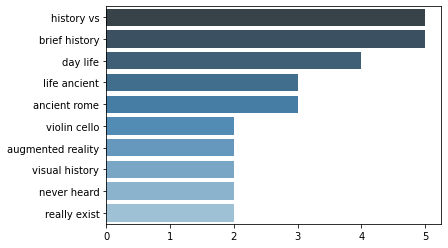

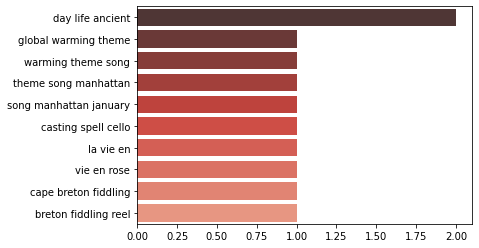

Cluster 2


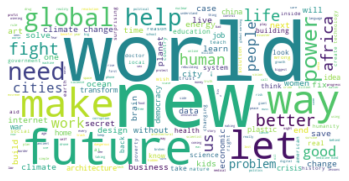

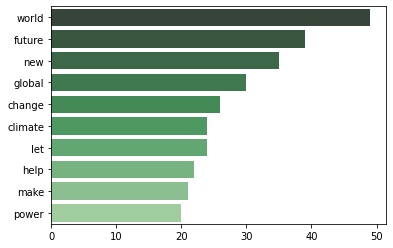

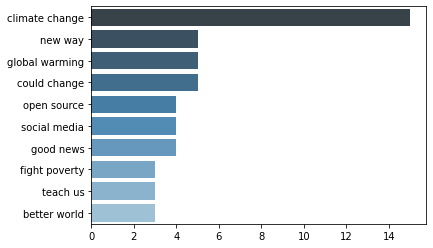

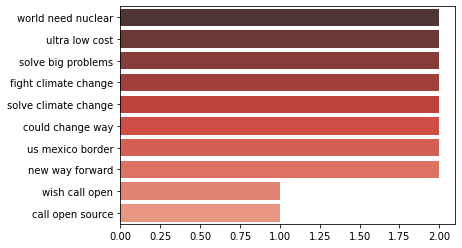

Cluster 3


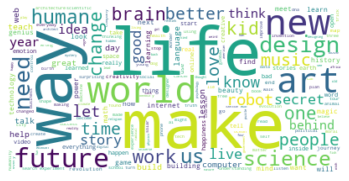

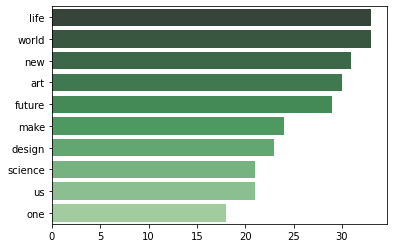

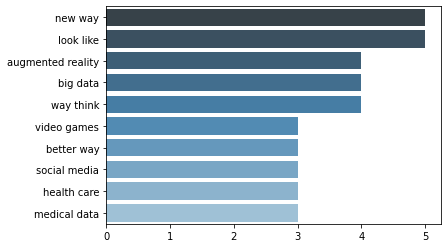

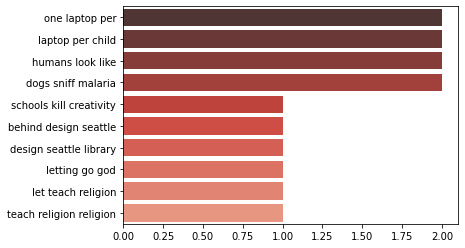

Cluster 4


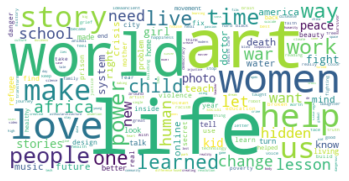

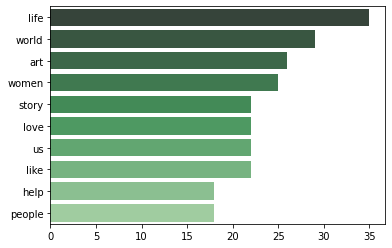

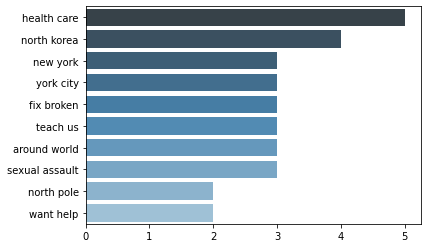

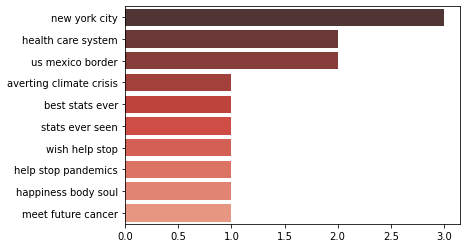

In [ ]:
# Cargo el modelo
models = loadModel("embeddings_gmm.pkl")
i = 5
cluster_visual_analisis(model=models[i-2],tipo_modelo="pycave",true_k=i)